# Лабораторная работа №4
# Выполнили: Залесская Галина, Елькина Варвара, 16ПМИ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') 

In [3]:
data = pd.read_csv("electricity_plant.csv")

Дан датасет, состоящий из информации о работе электростанции, как влиют различные физические параметры на итоговое количество произведенной энергии. Посмотрим, что это за кракозябра.

In [4]:
data[0:5]

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Необходимо найти, как первые четыре параметра влияют на пятый, постоив регрессию и найдя коэффициенты для каждого признака. Иначе говоря, какой вклад они вносят в результирующее значение.

Чтобы коэффициенты были более выраженными, нужно нормировать данные.

In [6]:
data = StandardScaler(copy = False).fit_transform(data)

x = data[:, 0:-1]
y = data[:, -1]
pol = PolynomialFeatures(degree=1)
x_pol = pol.fit_transform(X=x)
X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.25, random_state=42)

In [7]:
def model_info (model):
    model.fit(X_train, y_train)
    print ("R2 score: %f " % model.score(X_test,y_test))
    print ("coeff: {}".format(model.coef_[1:]))
    print ("intercept: %f" % model.intercept_)

In [8]:
def alpha_variation (model_name, max_al):
    al = np.linspace(0,max_al)
    r = []
    coef = []
    for i in al:
        model = model_name(alpha=i)
        model.fit(X_train, y_train)
        r.append(model.score(X_test,y_test))
        coef.append(model.coef_[1:])
    plt.figure(figsize=(45, 10))
    plt.plot(al, coef)
    plt.show()
    plt.figure(figsize=(45, 10))
    plt.plot(al, r)
    plt.show()
    print ("alpha range: %f\nr2 range: %f \t r2 max: %f, r2 min: %f " % (al.max()-al.min(), max(r)-min(r), max(r), min(r)))

# 1. Линейная регрессия

In [9]:
model_info(LinearRegression())

R2 score: 0.929194 
coeff: [-0.87154598 -0.17046181  0.01991361 -0.13576513]
intercept: 0.000673


Значение R^2 настолько близкое к единице говорит о качественном построении регрессии и ее высокой предсказательной способности. Какие мы молодцы :)

Почти все признаки обратно пропорциональны объемам энергии. Самое высокое по модулю значение имеет первый признак - температура. Второй и четвертый признаки тоже влияют, но не так значительно. Третий признак (влажность), единственный, имеет прямую зависимость с результатом, но значение его вклада настолько мало по модулю, что он едва влияет.

# 2. Ridge регрессия

In [10]:
model_info(Ridge(alpha=100))

R2 score: 0.929246 
coeff: [-0.81274531 -0.20512601  0.03259545 -0.11436748]
intercept: 0.000700


Значение R^2 почти не поменялось, равно как и поведение параметров в плане их влияние на результат.

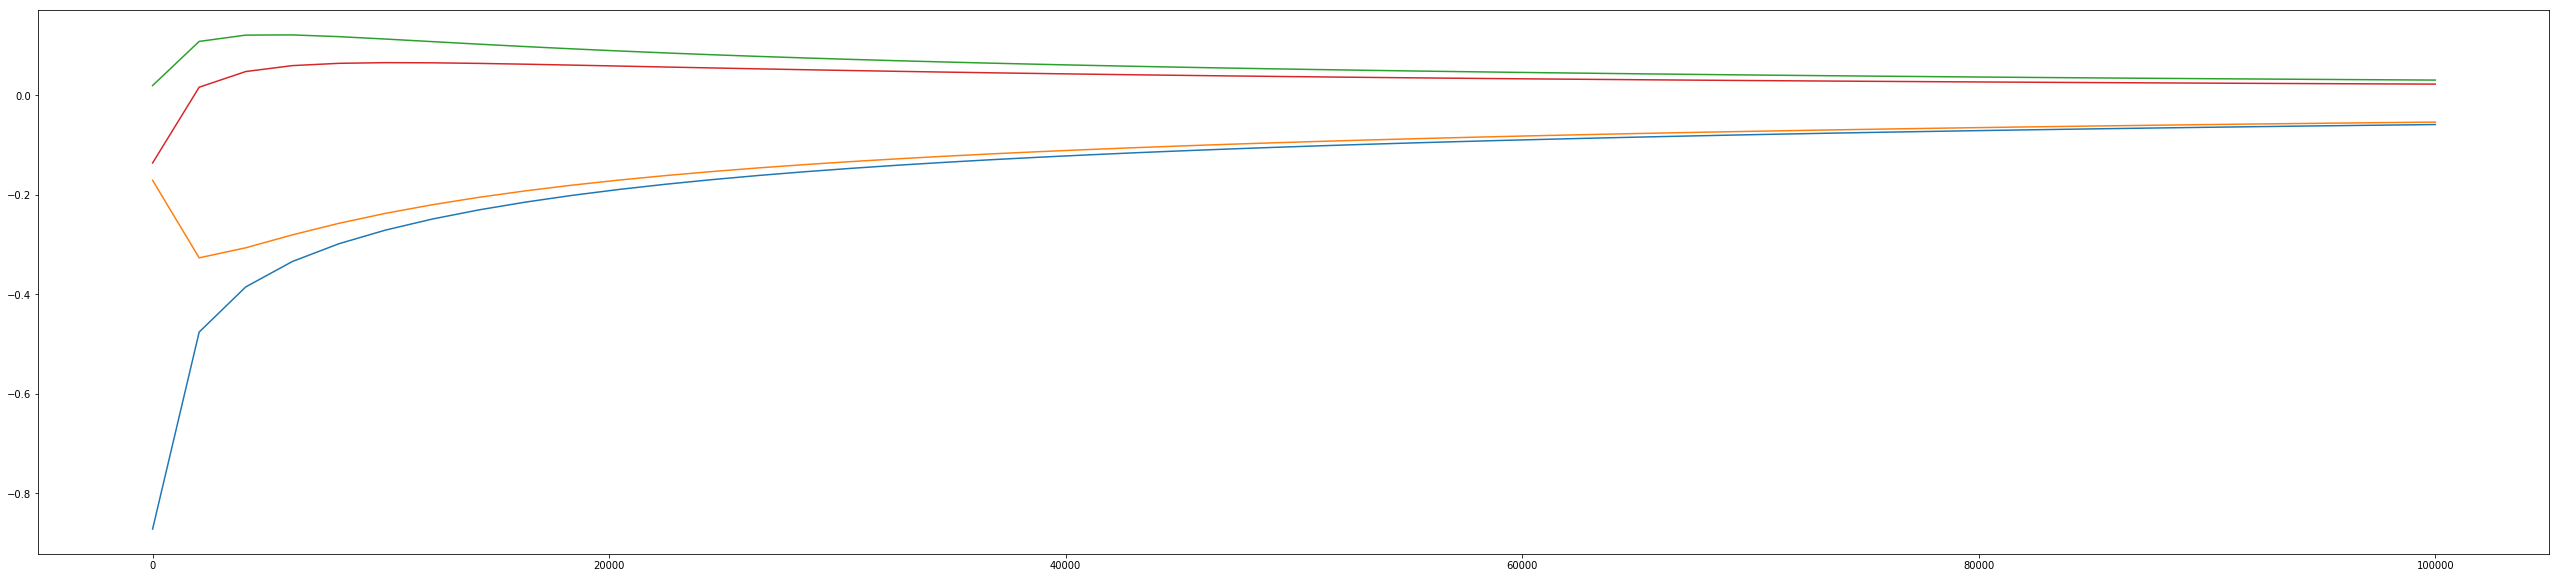

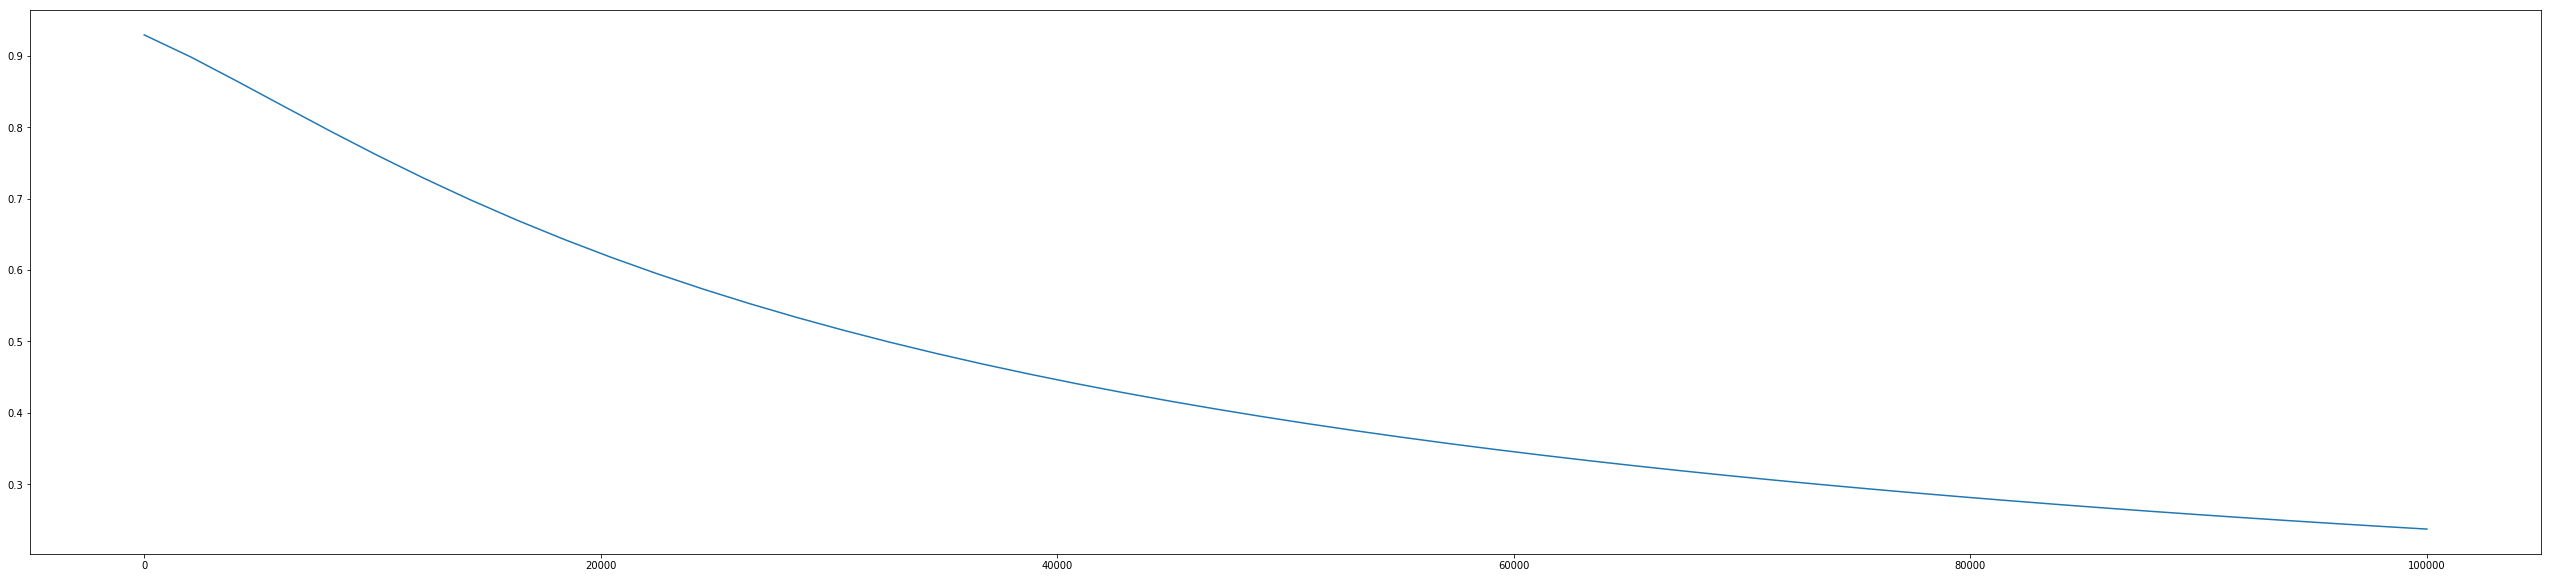

alpha range: 100000.000000
r2 range: 0.692124 	 r2 max: 0.929194, r2 min: 0.237070 


In [11]:
alpha_variation(Ridge,100000)

Если варьировать alpha в достаточно большом диапазоне(100 000), то можно добиться падения r^2 на 0.7. Можно опустить его еще ниже, но дальше он уменьшается совсем неохотно, и этот диапазон является наиболее показательным в плане зависимости alpha-r^2 score.

Говоря об изменениях параметров, они стартуют с оптимальных значений, дающих лучшее обобщение. Поведение первого, третьего и четвертого признаков почти одинаково: резкое повышение значения и последующее замедление движения, второй же признак (давление AP) сначала резко падает, а потом начинает тихонько расти. Что интересно, первый и второй, а также третий и четверый признаки со временем сходятся к одним и тем же значениям (-0.15 и 0 соответственно).
    
Соответствие признаков и цветных линий следующее:
   
    1) Температура (Т) - синяя
    
    2) Давление (AP) - желтая
    
    3) Влажность (RH) - зеленая
    
    4) Вакуум (V) - красная

# 3.Lasso регрессия

In [12]:
model_info(Lasso(alpha=10))

R2 score: -0.000036 
coeff: [-0. -0.  0.  0.]
intercept: 0.001495


Иван, получать такие данные очень страшно. С пар мы уяснили, что если R^2 получается отрицательным, то нужно остановиться и сказать себе: "Что ж ты делаешь, одУмОйся".

А если серьезно, это значит, что взятие среднего значения предсказывает результат лучше, чем наша регрессия. А все потому что для Лассо регрессии лучший результат получается при альфа близком к 0, а к 1 точность предсказания падает до 0.

In [13]:
model_info(Lasso(alpha=0.001)) #так-то лучше

R2 score: 0.929212 
coeff: [-0.86913529 -0.1709009   0.01972798 -0.13358325]
intercept: 0.000674


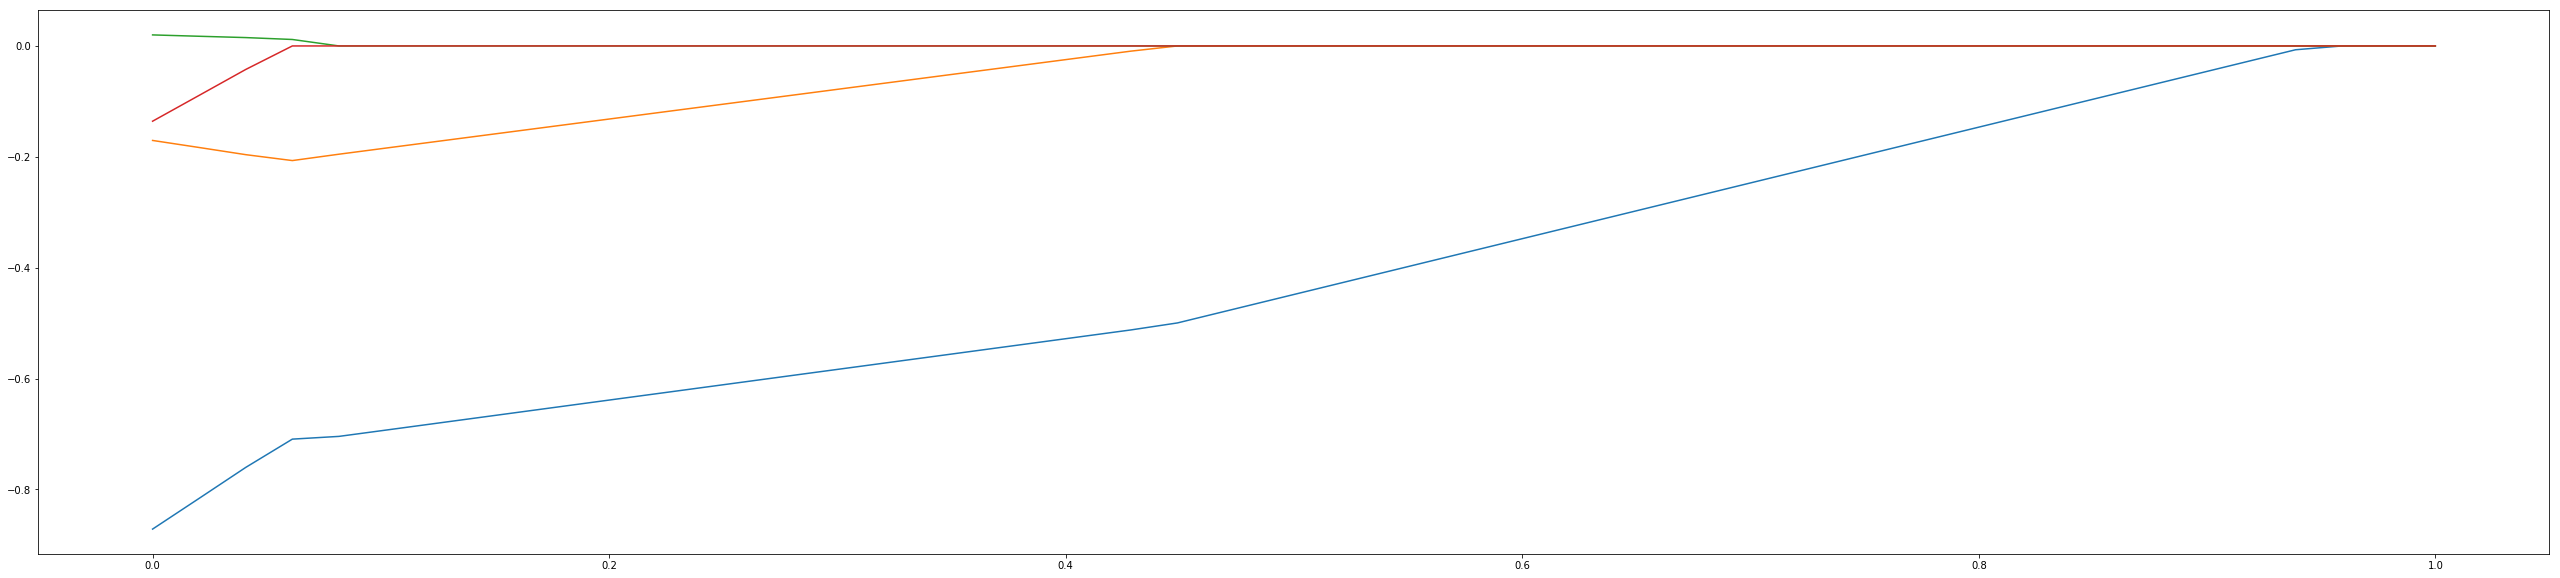

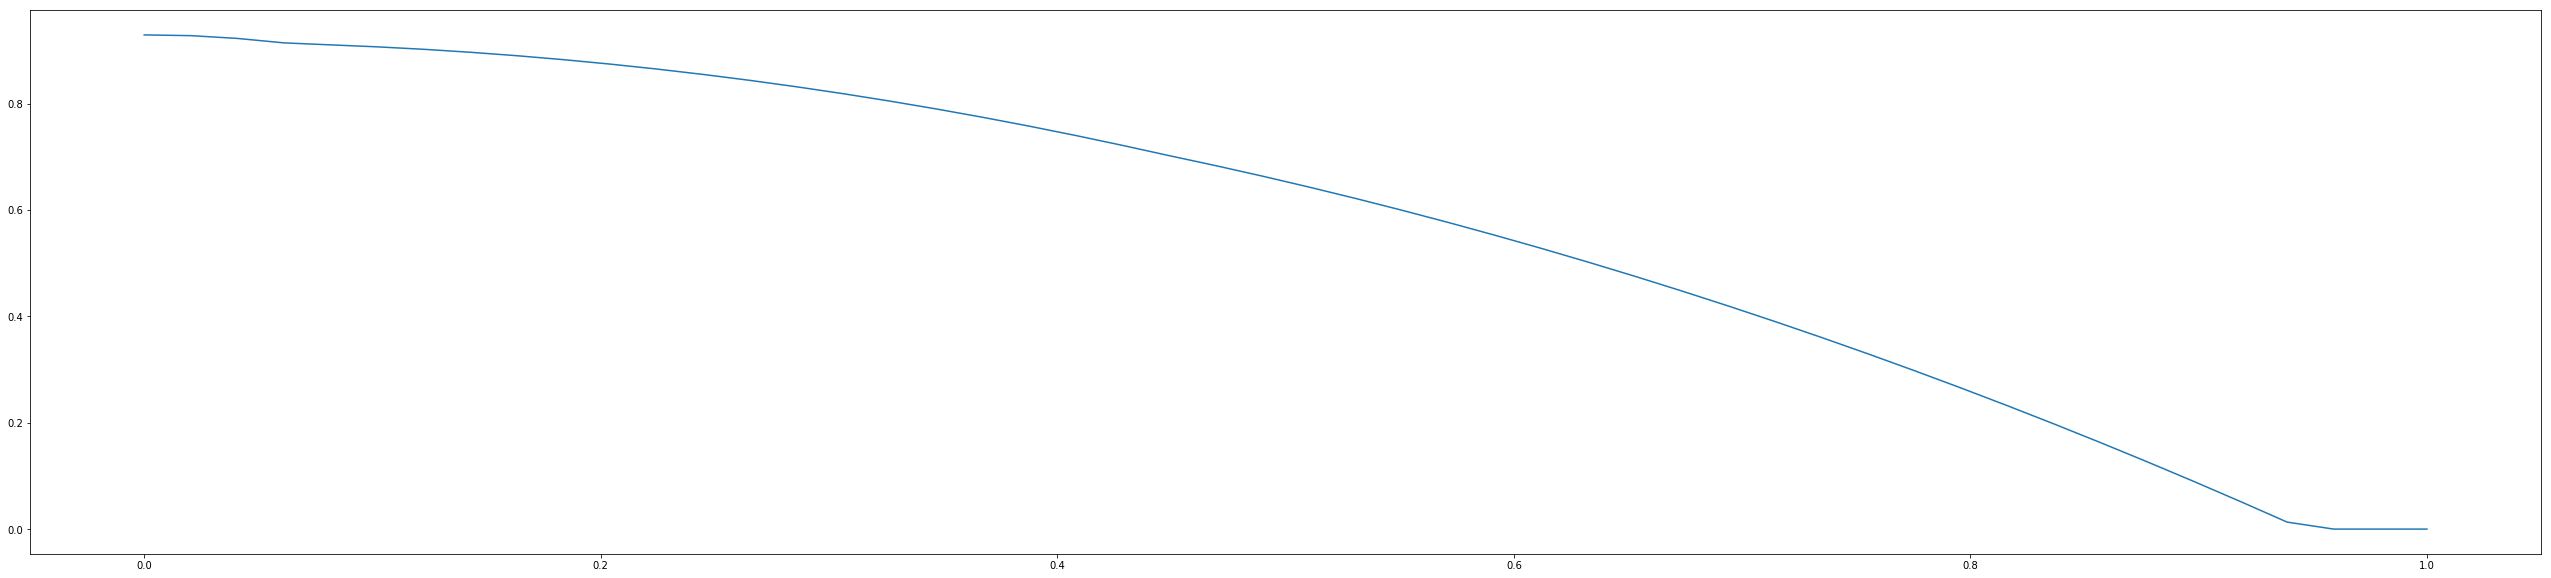

alpha range: 1.000000
r2 range: 0.929230 	 r2 max: 0.929194, r2 min: -0.000036 


In [14]:
alpha_variation(Lasso,1)

Поведение и коэффициентов, и значения R2 совпадает с поведением в Ridge-регрессии, только здесь все веселье происходит пока альфа не дойдет до единицы. А также здесь все коффициенты поочередно достигают значения 0 и остаются в нем. Порядок следующий: 3,4,2,1, это же является и порядком возрастания модулей коэффициентов. Это значит, что чем больше признак по модулю, тем больший вклад он вносит в результат и тем дольше прослеживается его влияние при увеличении параметра альфа.
    



In [15]:
my_data = pd.read_csv("noise.csv",delimiter='\t', names=['frequency', 'angle', 'length', 'velocity', 'thickness', 'pressure'])

In [16]:
my_data[0:5]

,frequency,angle,length,velocity,thickness,pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [17]:
my_data = StandardScaler(copy = False).fit_transform(my_data)

x = my_data[:, 0:-1]
y = my_data[:, -1]
pol = PolynomialFeatures(degree=4)
x_pol = pol.fit_transform(X=x)
X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.25, random_state=42)

Взяв параметры из предыдущего датасета, мы с грустью поняли, что все виды регрессии дают на них не очень хорошие результаты. Значит, зависимости между параметрами сложнее, и их нельзя уловить с помощью линейного полинома. Эта зацепка оказалась верной, потому что при степени полинома ^1 R^2 составлял примерно 0.51, ^2 - 0.63, ^3 - 0.73 и ^4 - 0.82. При дальнейшем повышении степени, эта характеристика падала.

Дальше дело было за малым: поварьировав alpha, найдем лучшую регрессию. Ею оказалась Ridge-регрессия с alpha=0.1 с результатом 0.827. Уря :)

In [18]:
model_info(Ridge(alpha=0.1))

R2 score: 0.827375 
coeff: [-1.93628028e+00 -1.75593095e+00 -1.48879538e+00  5.42446887e-01
  1.88264669e-01  2.58955914e-01  6.82850376e-02  1.71168274e-01
 -6.57107912e-06 -7.96448096e-01 -1.94583521e+00 -3.90263840e-01
  1.88264540e-01  4.80817559e-01  1.58947158e-02 -1.00196582e-01
 -9.19453110e-01 -2.03540151e-01 -2.19677308e-03 -3.56585670e-01
  2.69622219e-01 -1.03108904e-01  8.10169727e-01 -8.48492056e-02
  1.32167032e+00 -1.20003952e+00 -1.49631000e+00  4.53993693e-02
  2.65742436e+00  1.70355622e-01 -3.33374782e-02  1.61755481e+00
 -2.53127392e-02 -1.33850905e-01 -1.99918788e-01  1.15776967e-03
  5.05498716e-01  2.14711899e-01 -1.90904337e-01  1.84283446e+00
  4.18063120e-01 -9.56422807e-02  2.25112188e-01 -5.76896871e-01
 -6.70349502e-01  5.02160465e-01  7.72504358e-02 -3.33897692e-01
  1.81757780e-01 -5.85640308e-01 -3.59676339e-01 -1.76854620e-02
 -2.78544441e-01 -5.69464090e-02  3.99964577e-01 -2.77007339e-02
  8.31540260e-03 -5.62825446e-02  6.48095708e-03  2.45569607e-0

In [4]:
8*8+1

65

In [5]:
Out

{1: ['', 'In', 'Out', '2+2', '8*8+1', 'Out'], 3: 4, 4: 65}